<a href="https://colab.research.google.com/github/supreethms1809/pytorch_tut/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib as plt
device = "cuda" if torch.cuda.is_available else "cpu"

torch.__version__


'2.1.0+cu121'

Linear regression

we have created some data X and y using a relation.
We want to estimate the weight and bias or the function using a machine learning model

In [2]:
## Data (preparing and loading)

weight = 0.7
bias = 0.3

#create some data

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
#split the data
train_len = int(0.8*len(X))
X_train = X[:train_len]
y_train = y[:train_len]

X_test = X[train_len:]
y_test = y[train_len:]



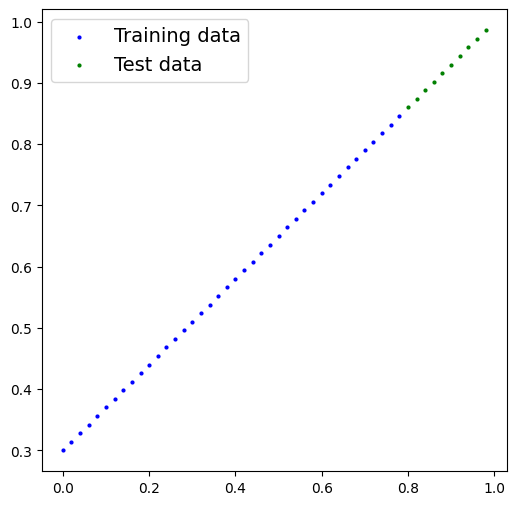

In [54]:
import matplotlib.pyplot as plt
def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions=None):
  plt.figure(figsize=(6, 6))
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="Test data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

  plt.legend(prop={"size": 14})

plot_prediction();

In [33]:
import torch
from torch import nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


torch.manual_seed(42)
predictions = LinearRegressionModel()
print(list(predictions.parameters()))
print(predictions.state_dict())
predictions(X_test)

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [34]:
import torch
from torch import nn
#setup a loss function
loss_fn = nn.L1Loss()
c_loss_fn = nn.CrossEntropyLoss()

#setup an optimizer
optimizer = torch.optim.SGD(params=predictions.parameters(),
                            lr = 0.00001,
                            )



In [35]:
# Building a training loop and testing loop in pytorch
epochs = 10000

#Tracking the values
epoch_count = []
loss_values = []
test_loss_value = []

#Step 0
for epoch in range(epochs):
   # set the training mode
   predictions.train()

   #Forward pass
   y_pred = predictions(X_train)

   # Calculate the loss
   loss = loss_fn(y_pred,y_train)

   # Optimizer zero grad
   optimizer.zero_grad()

   #Perform backpropogation
   loss.backward()

   #setuo the optimizer
   optimizer.step()
   epoch_count.append(epoch)
   loss_values.append(loss)
   if epoch%10 == 0:
    print(f'Train-->Loss: {loss}, epoch: {epoch}')

   # Testing
    predictions.eval()
    with torch.no_grad():
      y_test_pred = predictions(X_test)
      test_loss = loss_fn(y_test_pred,y_test)
      test_loss_value.append(test_loss)
    if epoch%10 == 0:
      print(f'Test --> Loss: {loss}, epoch: {epoch}')

predictions.state_dict()
#predictions.eval()


Train-->Loss: 0.31288138031959534, epoch: 0
Test --> Loss: 0.31288138031959534, epoch: 0
Train-->Loss: 0.3127661347389221, epoch: 10
Test --> Loss: 0.3127661347389221, epoch: 10
Train-->Loss: 0.3126509487628937, epoch: 20
Test --> Loss: 0.3126509487628937, epoch: 20
Train-->Loss: 0.31253570318222046, epoch: 30
Test --> Loss: 0.31253570318222046, epoch: 30
Train-->Loss: 0.312420517206192, epoch: 40
Test --> Loss: 0.312420517206192, epoch: 40
Train-->Loss: 0.3123053312301636, epoch: 50
Test --> Loss: 0.3123053312301636, epoch: 50
Train-->Loss: 0.31219008564949036, epoch: 60
Test --> Loss: 0.31219008564949036, epoch: 60
Train-->Loss: 0.3120748698711395, epoch: 70
Test --> Loss: 0.3120748698711395, epoch: 70
Train-->Loss: 0.3119596540927887, epoch: 80
Test --> Loss: 0.3119596540927887, epoch: 80
Train-->Loss: 0.3118444085121155, epoch: 90
Test --> Loss: 0.3118444085121155, epoch: 90
Train-->Loss: 0.31172922253608704, epoch: 100
Test --> Loss: 0.31172922253608704, epoch: 100
Train-->Loss: 0

OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])

In [45]:
!pip install matplotlib

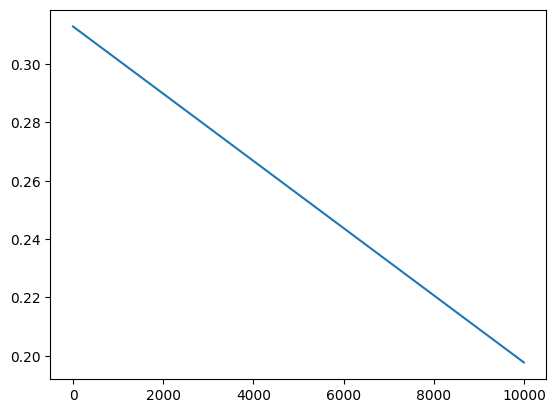

In [47]:
#import matplotlib as plt
import matplotlib.pyplot as plt
torch.tensor(epoch_count).numpy(),torch.tensor(loss_values).numpy(),torch.tensor(test_loss_value).numpy()
plt.plot(torch.tensor(epoch_count).numpy(),torch.tensor(loss_values).numpy(),label="Train Loss")
plt.show()